In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# ETL

In [11]:
data = pd.read_csv("dataset/electronics.csv", low_memory=False)
data

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"
...,...,...,...,...,...,...,...,...,...
9595,PALAY® BTS Backpack For Boys Kpop BTS Bangtan ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PALAY%C2%AE-Backpack-Ban...,4.1,37,"₹1,710","₹2,491"
9596,MOCA iPad Air 5th Generation Case 2022 / iPad ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MOCA-Protective-Generati...,4.2,"1,133",₹475,"₹1,999"
9597,ZEBRONICS Zeb-Sound Bomb 5 TWS V5.0 Bluetooth ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Zebronics-Zeb-Sound-Blue...,3.5,"3,177",₹962,"₹3,999"
9598,LINQS® Original NXP Chip | Waterproof NFC Tag ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/LINQS-Sticker-Smartrac-C...,3.6,210,₹400,"₹1,000"


In [13]:
# Se quitan las columnas innecesarias
data = data.drop('image', axis=1)
data = data.drop('link', axis=1)
data = data.drop('no_of_ratings', axis=1)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            9600 non-null   object
 1   main_category   9600 non-null   object
 2   sub_category    9600 non-null   object
 3   ratings         9505 non-null   object
 4   discount_price  9116 non-null   object
 5   actual_price    9530 non-null   object
dtypes: object(6)
memory usage: 450.1+ KB


In [17]:
#Eliminación de nulos
data = data.dropna()

In [19]:
data.isnull().sum()

name              0
main_category     0
sub_category      0
ratings           0
discount_price    0
actual_price      0
dtype: int64

In [23]:
# Eliminación del caracter de la rupia china, ya que molesta la normalización de los datos al ser de tipo objeto
data['actual_price'] = data['actual_price'].str.replace('₹', '')
data['discount_price'] = data['discount_price'].str.replace('₹', '')

In [25]:
# Conversión a valores numericos
data[["ratings", "discount_price", "actual_price"]] = data[["ratings", "discount_price", "actual_price"]].apply(pd.to_numeric, errors='coerce')

data = data.dropna(subset=["ratings", "discount_price", "actual_price"])

In [27]:
#Conversión a valores flotantes
data[["ratings", "discount_price", "actual_price"]] = data[["ratings", "discount_price", "actual_price"]].astype(float)

C:\Users\34665\AppData\Local\Temp\ipykernel_18108\3279789620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["ratings", "discount_price", "actual_price"]] = data[["ratings", "discount_price", "actual_price"]].astype(float)


In [29]:
# Traducción de columnas
data.columns = ['nombre', 'categoria', "sub_categoria", "calificacion", "precio_descuento", "precio_actual"]

In [13]:
data

,nombre,categoria,sub_categoria,calificacion,precio_descuento,precio_actual
15,boAt BassHeads 100 in-Ear Wired Headphones wit...,"tv, audio & cameras",All Electronics,4.1,399.0,999.0
17,Lapster 5-in-1 Multi-Function Laptop Cleaning ...,"tv, audio & cameras",All Electronics,4.2,97.0,999.0
32,SanDisk Cruzer Blade 32GB USB Flash Drive,"tv, audio & cameras",All Electronics,4.3,278.0,650.0
42,Portronics Toad 23 Wireless Optical Mouse with...,"tv, audio & cameras",All Electronics,4.1,299.0,599.0
44,ZEBRONICS Zeb-Bro in Ear Wired Earphones with ...,"tv, audio & cameras",All Electronics,3.5,149.0,399.0
...,...,...,...,...,...,...
9585,"LUNAGARIYA®, Protective Cover for LG AC Remote...","tv, audio & cameras",All Electronics,4.3,199.0,399.0
9588,Kangaro Paper Punch DP 700 - Colour May Vary,"tv, audio & cameras",All Electronics,4.5,465.0,575.0
9589,wooum Polyester iPad 11 Pro Sleeve / Case / Po...,"tv, audio & cameras",All Electronics,4.3,328.7,999.0
9590,"Lauret Blanc Daily Planner and Organizer, Grat...","tv, audio & cameras",All Electronics,4.4,449.0,899.0


In [31]:
# Exportación para el consumo desde el Streamlit
data.to_csv("dataset/data.csv", index=False)

## Visualización de precios

C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


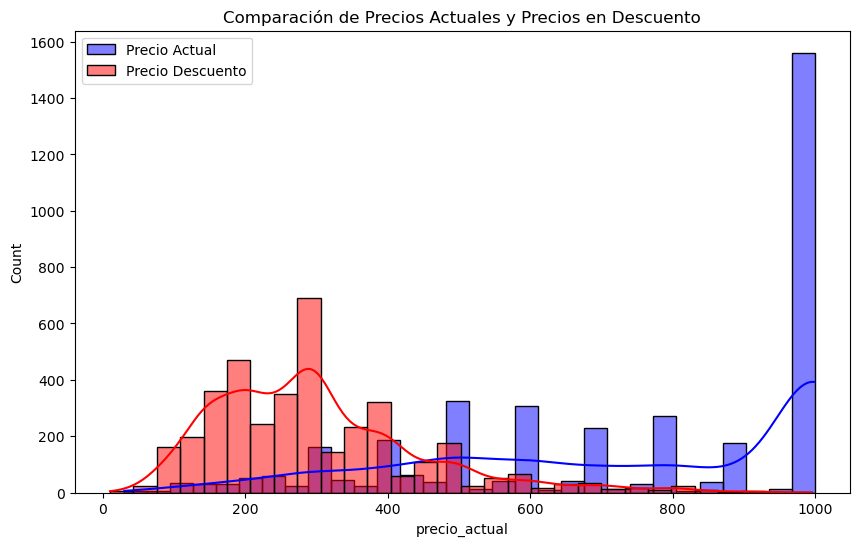

In [33]:
plt.figure(figsize=(10,6))

sns.histplot(data=data, x="precio_actual", bins=30, kde=True, color='blue', label='Precio Actual')

sns.histplot(data=data, x="precio_descuento", bins=30, kde=True, color='red', label='Precio Descuento')

plt.title('Comparación de Precios Actuales y Precios en Descuento')
plt.legend()
plt.show()


In [37]:
# Primero, vamos a convertir la columna 'nombre' a una representación numérica usando TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['nombre'])

# Luego, vamos a añadir las columnas numéricas a nuestra matriz de características
features = np.column_stack([tfidf_matrix.toarray(), data['calificacion'], data['precio_descuento'], data['precio_actual']])
features


array([[  0. ,   0. ,   0. , ...,   4.1, 399. , 999. ],
       [  0. ,   0. ,   0. , ...,   4.2,  97. , 999. ],
       [  0. ,   0. ,   0. , ...,   4.3, 278. , 650. ],
       ...,
       [  0. ,   0. ,   0. , ...,   4.3, 328.7, 999. ],
       [  0. ,   0. ,   0. , ...,   4.4, 449. , 899. ],
       [  0. ,   0. ,   0. , ...,   4.2, 189. , 999. ]])

In [17]:
# Reindexamos el DataFrame
data = data.reset_index(drop=True)

# Ahora, calculamos la matriz de similitud de coseno
similarity_matrix = cosine_similarity(features)

# Para hacer recomendaciones, puedes buscar los productos más similares a un producto dado
nombre_del_producto = "SanDisk Cruzer Blade 32GB USB Flash Drive"  # El nombre del producto para el que quieres hacer recomendaciones
producto = data[data['nombre'] == nombre_del_producto]

if not producto.empty:
    product_index = producto.index[0]
    product_similarities = similarity_matrix[product_index]
    most_similar_products_indices = np.argsort(-product_similarities)
    most_similar_products = data.loc[most_similar_products_indices, 'nombre']
    print("Los productos más similares al producto", nombre_del_producto, "son:")
    print(most_similar_products)
else:
    print("Producto no encontrado")


Los productos más similares al producto SanDisk Cruzer Blade 32GB USB Flash Drive son:
2               SanDisk Cruzer Blade 32GB USB Flash Drive
839                 HP v207w 32GB USB 2.0 Pen Drive,Black
1263    Gizga Essentials Hard Drive Case Shell, 6.35cm...
3682    CodersParadise Pack of 50 Random Anime Aesthet...
2427    CodersParadise Laptop Sticker for Programmer, ...
                              ...                        
1405    Parker Vector Standard Gold Trim Roller Ball P...
194                          Camlin Brush Pens, 24 Shades
662     Cello Aspro Mavro Ball Pen | Black Ball Pen | ...
313               HP 805 Tri-Color Original Ink Cartridge
269                        HP 678 Tri-Color Ink Cartridge
Name: nombre, Length: 3835, dtype: object


### Algunas pruebas de recomendación

In [18]:
# Para hacer recomendaciones, puedes buscar los productos más similares a un producto dado
nombre_del_producto = "SanDisk Cruzer Blade 32GB USB Flash Drive"  # El nombre del producto para el que quieres hacer recomendaciones
producto = data[data['nombre'] == nombre_del_producto]

if not producto.empty:
    product_index = producto.index[0]
    product_similarities = similarity_matrix[product_index]
    most_similar_products_indices = np.argsort(-product_similarities)

    # Obtenemos los nombres de los 10 productos más similares
    top_10_similar_products = data.loc[most_similar_products_indices[:10], 'nombre']
    print("Los 10 productos más similares al producto", nombre_del_producto, "son:")
    print(top_10_similar_products)
else:
    print("Producto no encontrado")


Los 10 productos más similares al producto SanDisk Cruzer Blade 32GB USB Flash Drive son:
2               SanDisk Cruzer Blade 32GB USB Flash Drive
839                 HP v207w 32GB USB 2.0 Pen Drive,Black
1263    Gizga Essentials Hard Drive Case Shell, 6.35cm...
3682    CodersParadise Pack of 50 Random Anime Aesthet...
2427    CodersParadise Laptop Sticker for Programmer, ...
2745    CodersParadise Pack of 58 Random Music Aesthet...
1705    Storite 20cm USB 3.0 Cable A to Micro B high S...
3124    A3sprime Back Camera Lens Ring Guard Protector...
2610    iVoltaa 3.5mm Metal Braided Aux (Auxiliary) to...
1382    Ant Value Fkbri01 Wired Usb Multi-Device Keybo...
Name: nombre, dtype: object


In [19]:
# Para hacer recomendaciones, puedes buscar los productos más similares a un producto dado
nombre_del_producto = "boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)"  # El nombre del producto para el que quieres hacer recomendaciones
producto = data[data['nombre'] == nombre_del_producto]

if not producto.empty:
    product_index = producto.index[0]
    product_similarities = similarity_matrix[product_index]
    most_similar_products_indices = np.argsort(-product_similarities)

    # Obtenemos los nombres de los 10 productos más similares
    top_10_similar_products = data.loc[most_similar_products_indices[:10], 'nombre']
    print("Los 10 productos más similares al producto", nombre_del_producto, "son:")
    print(top_10_similar_products)
else:
    print("Producto no encontrado")


Los 10 productos más similares al producto boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black) son:
0      boAt BassHeads 100 in-Ear Wired Headphones wit...
116    boAt BassHeads 100 in-Ear Wired Headphones wit...
41     boAt Bassheads 100 in Ear Wired Earphones with...
81     boAt Bassheads 100 Wired in Ear Earphones with...
274    boAt Bassheads 100 Wired in Ear Earphones with...
17     boAt BassHeads 220 Wired in Ear Earphones with...
181    boAt Bassheads 220 Wired in Ear Earphones with...
5      boAt Bassheads 220 Wired in Ear Earphones(Blac...
155    boAt Bassheads 220 Wired in Ear Earphones(Indi...
95     boAt Bassheads 220 Wired in Ear Earphones(Indi...
Name: nombre, dtype: object
